# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Данные взяты  из портала открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

        
  > # Цель исследования
  Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили           государственную поддержку. Узнать насколько такие фильмы интересны зрителю.
  >> # Ход исследования
      - Обзор данных
      - Предобработка данных
      - Исследовательский анализ данных
      - Анализ фильмов с господдержкой
      - Общий вывод

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

try:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_movies = pd.read_csv('C:/Users/Андрей/Andrey_Panasenko_Research_data_analysis_v01/sbor1/mkrf_movies.csv')
    data_shows = pd.read_csv('C:/Users/Андрей/Andrey_Panasenko_Research_data_analysis_v01/sbor1/mkrf_shows.csv')

# Описание данных

 -   title — название фильма;
 -   puNumber — номер прокатного удостоверения;
 -   show_start_date — дата премьеры фильма;
 -   type — тип фильма;
 -   film_studio — студия-производитель;
 -   production_country — страна-производитель;
 -   director — режиссёр;
 -   producer — продюсер;
 -   age_restriction — возрастная категория;
 -   refundable_support — объём возвратных средств государственной поддержки;
 -   nonrefundable_support — объём невозвратных средств государственной поддержки;
 -    financing_source — источник государственного финансирования;
 -    budget — общий бюджет фильма;
 -    ratings — рейтинг фильма на КиноПоиске;
 -    genres — жанр фильма.
 -    puNumber — номер прокатного удостоверения;
 -    box_office — сборы в рублях.

In [2]:
data_movies.head() #ознакомимся с первым файлом

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
data_movies['puNumber'].isna().sum() # при попытке слияния данных обнаружилось, что в столбце puNumber файла mkrf_movies.csv есть тип str, тогда как в другом файле тип даных столбца с аналогичным названием int

0

In [5]:
data_movies = data_movies.query('puNumber != "нет"').reset_index(drop=True) # при попытке изменить тип на int появилась ошибка, из которой следовало что одна из ячеек содержет слово "нет".
# удаляем и сбрасываем индексы

In [6]:
data_movies['puNumber'] = data_movies['puNumber'].astype('int') # меням тип данных


In [7]:

data_shows #ознакомимся с вторым файлом


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [8]:
df = data_movies.merge(data_shows, on = 'puNumber', how = 'left') # обьединяем два датасета в один датафрейм

In [9]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Результаты знакомства с данными
В результате знакомства с данными были выявлены ***пропуски*** в следйющих столбцах: 

film_studio 

production_country

director

producer
  
refundable_support 

nonrefundable_support 

budget 

financing_source 

ratings 

genres 

box_office

Также предварительно были выявлены ***несоответсвия типов данных*** в следйющих столбцах:

show_start_date

ratings

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
# более подробно рассмотрим типы данных
display(df.tail(10))
df.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7475,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN
7476,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7477,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7478,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:

# следует заменить, как говорилось в обзоре данных, show_start_date на datetime, ratings на float  

df['show_start_date'] = pd.to_datetime(df['show_start_date'], format ='%Y-%m-%dT%H:%M:%S')



In [13]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [14]:
# столбец ratings должен иметь числовой формат
# в этом столбце имеются строки, поэтому создадим функцию которая превратит рейтинг из процентов в десятичную оценку

def rating_convertor(i):

    if isinstance(i, str) and '%' in i:
         return float(i[:-1])/100
    return float(i)


In [15]:
df['ratings'] = df['ratings'].apply(rating_convertor)

In [16]:
df['ratings'].unique() 

array([7.2 , 6.6 , 6.8 , 7.7 , 8.3 , 8.  , 7.8 , 8.1 , 7.1 , 6.  , 7.4 ,
       5.8 , 8.7 , 6.3 , 6.9 , 5.  , 4.3 , 7.3 , 7.  , 6.4 ,  nan, 8.2 ,
       7.5 , 6.7 , 7.9 , 5.9 , 6.2 , 5.6 , 6.5 , 2.4 , 7.6 , 6.1 , 8.6 ,
       8.5 , 8.8 , 5.5 , 5.1 , 5.7 , 5.4 , 0.99, 4.4 , 4.5 , 5.3 , 4.1 ,
       8.4 , 2.6 , 3.8 , 4.6 , 4.8 , 4.  , 3.  , 1.6 , 4.2 , 5.2 , 4.7 ,
       4.9 , 3.9 , 2.7 , 3.3 , 2.9 , 0.28, 3.7 , 1.4 , 3.1 , 0.97, 3.5 ,
       3.2 , 2.8 , 1.5 , 2.1 , 2.5 , 9.2 , 3.4 , 1.1 , 3.6 , 0.83, 0.64,
       0.91, 0.94, 0.62, 0.79, 0.9 , 0.19, 0.88, 1.  , 0.89, 1.3 , 1.9 ,
       1.8 , 1.2 , 1.7 , 9.  , 0.98, 8.9 , 9.1 ])

##### Результаты проверки типов данных
В результате проверки типов данных были внесены измениния в столбцы: show_start_date на datetime, ratings на float.



#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
# посмотрим какую долю в процентах занимают пропуски в каждом столбце
pd.options.display.float_format = '{:,.1f}'.format # отобразим резудьтат не в научном формате
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


In [18]:
# сразу видно что в столбце producer всего 8% пропусков, для экономии времени удалим эти строки.
df = df.dropna(subset = ['producer']).reset_index(drop=True)
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,0.000000
age_restriction,0.000000
refundable_support,95.000000


In [19]:
df.query('ratings.isna() == True').head(10)
# оставим пропуски, так как заполнить их каким то явным занчением невозможно 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
22,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,"Три тенора: Лучано Паваротти, Пласидо Доминго ...",126000312,2012-01-27 12:00:00+00:00,Прочие,Декка,Италия,Брайан Лардж,Герберт Чаппелл,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,"Осторожно, Любовь! (S.O.S Love! - The Million ...",121005812,2012-03-05 12:00:00+00:00,Художественный,"Имаджиком Продакшнз,Эстлейк Филмз, Солт Студио",США - Венгрия - Великобритания,Томаш Сас,"Томас Кониглиаро, Томаш Сас, Агнес Фернандез, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Киногамма. Часть 1: Восток,126001012,2012-03-15 12:00:00+00:00,Прочие,Фильм Дистрибусьон,Франция,Зигфрид,Зигфрид,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Киногамма. Часть 2: Дальний Восток,126001112,2012-03-15 12:00:00+00:00,Прочие,Фильм Дистрибусьон,Франция,Зигфрид,Зигфрид,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fundable_support, nonrefundable_support, budget, financing_source исмеют наибольший однаковый процент пропусков, однако известно что ти столбцы связаны с гос поддержкой и пропуски означают только то, что фильмы не поддердивались мин культуры и фондом кино. Их стоит оставить без измнения

Также пропуски в жанрах и рейтинге оставим без изменений


In [20]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

<AxesSubplot:title={'center':'количество пропусков по годам'}, xlabel='year'>

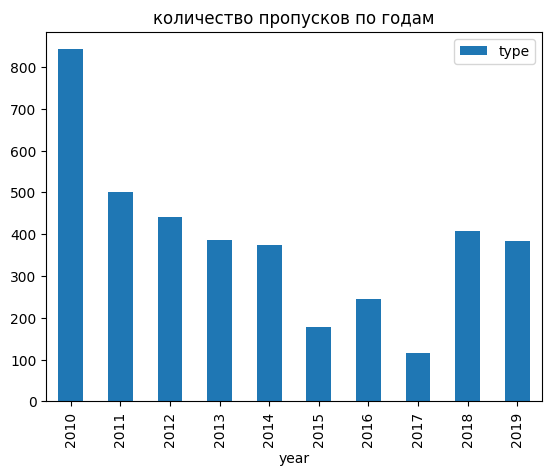

In [21]:
df.query('box_office.isna()').pivot_table(index = 'year', values = 'type', aggfunc = 'count').plot(kind='bar', title = 'количество пропусков по годам')# пропуски по годам

##### Результат обработки пропусков

Были удалены пропуски из столбца producer (8% пропусков)

В остальных столбцах удаление пропусков или их замена невозможны

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
for name,values in df.iteritems():
    if name in ['title','genres','financing_source','producer','director','production_country','film_studio','type']:
        df[name] = df[name].str.lower()
 
        

#Поиск явных дупликатов 
#Приведем строки к нижнему регистру

df['title'] = df['title'].str.lower()
df['genres'] = df['genres'].str.lower().str.strip()
df['financing_source'] = df['financing_source'].str.lower().str.strip()
df['producer'] = df['producer'].str.lower().str.strip()
df['director'] = df['director'].str.lower().str.strip()
df['production_country'] = df['production_country'].str.lower().str.strip()
df['film_studio'] = df['film_studio'].str.lower().str.strip()
df['type'] = df['type'].str.lower().str.strip()
df.duplicated().sum()

In [23]:
df = df.replace('ё','е')

In [24]:
df.duplicated().sum()

0

явных дупликатов не обнаружено


In [25]:
df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', ' художественный', ' анимационный',
       'музыкально-развлекательный'], dtype=object)

In [26]:

df['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       'юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента ',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия "анимаккорд"'], dtype=object)

На поиск неявных дубликатов в этом списке уйдет слишком много времени, поэтому оставим этот столбец без изменения. Стоит обратить внимание инженеров по сбору данных на представления информации в этом столбце.

In [27]:
df['production_country']

0                           сша
1                           сша
2                           сша
3                           сша
4                           сша
                 ...           
6912             великобритания
6913                        сша
6914               сша - канада
6915    республика кипр, россия
6916    республика кипр, россия
Name: production_country, Length: 6917, dtype: object

In [28]:
df['production_country'].unique()

array(['сша', 'франция', 'германия-великобритания',
       'великобритания - италия', 'сша - франция - турция',
       'новая зеландия', 'канада - франция - испания', 'сша-германия',
       'сша - великобритания', 'великобритания', 'сша - германия',
       'франция - мексика - сша', 'германия',
       'великобритания-сша-германия-кнр', 'гонконг, кнр', 'сша - франция',
       'сша - япония - франция - великобритания',
       'гонконг - сингапур - таиланд - великобритания', 'сша-канада',
       'франция - сша', 'ирландия-великобритания-германия',
       'сша-австралия', 'сша-франция-великобритания-австрия',
       'сша - бельгия', 'сша - ирландия - великобритания',
       'люксембург - нидерланды - испания - великобритания - сша - италия',
       'великобритания - франция - сша', 'новая зеландия - сша',
       'сша - великобритания - чехия',
       'канада - франция - великобритания', 'ирландия',
       'великобритания - германия - сша',
       'сша - франция - великобритания', 'франция 

In [29]:
df['production_country'].nunique()

907

In [30]:
# создадим функцию для того, чтобы заменить "-" на " "

def change(i):
    if isinstance(i, str) and "-" in i:
        return i.replace('-', ' ')
    return i    

In [31]:
df['production_country'] = df['production_country'].apply(change)


In [32]:
df['production_country'].unique()

array(['сша', 'франция', 'германия великобритания',
       'великобритания   италия', 'сша   франция   турция',
       'новая зеландия', 'канада   франция   испания', 'сша германия',
       'сша   великобритания', 'великобритания', 'сша   германия',
       'франция   мексика   сша', 'германия',
       'великобритания сша германия кнр', 'гонконг, кнр', 'сша   франция',
       'сша   япония   франция   великобритания',
       'гонконг   сингапур   таиланд   великобритания', 'сша канада',
       'франция   сша', 'ирландия великобритания германия',
       'сша австралия', 'сша франция великобритания австрия',
       'сша   бельгия', 'сша   ирландия   великобритания',
       'люксембург   нидерланды   испания   великобритания   сша   италия',
       'великобритания   франция   сша', 'новая зеландия   сша',
       'сша   великобритания   чехия',
       'канада   франция   великобритания', 'ирландия',
       'великобритания   германия   сша',
       'сша   франция   великобритания', 'франция 

In [33]:
df['production_country'].nunique()

907

In [34]:
df['director'].nunique()

4485

In [35]:
df['director']

0           кевин костнер
1       тимур бекмамбетов
2       тимур бекмамбетов
3       тимур бекмамбетов
4           джон туртурро
              ...        
6912          фил грабски
6913           ник пауэлл
6914     чарльз е.бастьен
6915             а.беляев
6916             и.трусов
Name: director, Length: 6917, dtype: object

In [36]:
def dir_name(i):
    if isinstance(i, str) and "." in i[1] :
        return i[2:]
    return i    

In [37]:
df['director'] = df['director'].apply(dir_name)

In [38]:
df['producer'].str.split(', ').str[1]

0        кевин костнер
1        джейсон нетер
2        джейсон нетер
3        джейсон нетер
4        джон туртурро
             ...      
6912               NaN
6913    дэниэл гродник
6914               NaN
6915               NaN
6916               NaN
Name: producer, Length: 6917, dtype: object

In [39]:
df['director'].nunique()

4408

Нашли 77 дубликатов в этом столбце

In [40]:
df['title'].nunique()

6209

In [41]:
df['title'].value_counts().head(20)

день святого валентина_                                        5
там, где живут чудовища                                        4
код доступа "кейптаун"                                         4
шерлок холмс                                                   4
кошки против собак: месть китти галор                          4
лузеры                                                         4
гарри поттер и дары смерти - часть 1/по роману дж.к.ролинг/    4
безумцы                                                        4
белая мгла /по комиксу грега рукка и стива либера/             4
жена путешественника во времени                                4
секс в большом городе 2                                        4
доброе утро                                                    4
рапунцель: запутанная история                                  4
дорога /по новелле кормака мккарфи/                            4
робин гуд (robin hood)                                         4
непокоренный.            

In [42]:
# избавимся от спецсимволов в конце названий

def title(i):
    if "/" in i[-1] or "." in i[-1] or "_" in i[-1]  :
        return i.strip()[:-1]
    return i

In [43]:
# избавимся от поясняющих записей типа " .../по роману..."
def title_find(i):
    if "/" in i:      
        index = i.find('/')
        return i[:index]  
                         
    return i

In [44]:
df['title'] = df['title'].apply(title)

In [45]:
df['title'].value_counts().head(20)

день святого валентина                             5
волшебная страна                                   5
секс в большом городе 2                            4
жена путешественника во времени                    4
код доступа "кейптаун"                             4
король лев                                         4
дорога /по новелле кормака мккарфи                 4
двойной копец                                      4
начало                                             4
форсаж 7                                           4
кошмар на улице вязов /фильм ужасов                4
дитя тьмы                                          4
там, где живут чудовища                            4
рапунцель: запутанная история                      4
кошки против собак: месть китти галор              4
шерлок холмс                                       4
не брать живым /по книге раджива чандрасекарана    4
красавчик-2                                        4
безумцы                                       

In [46]:
df['title'] = df['title'].apply(title_find)

In [47]:
df['title'].value_counts().head(20)

день святого валентина                   5
волшебная страна                         5
не брать живым                           4
кошмар на улице вязов                    4
гарри поттер и дары смерти - часть 1     4
двойной копец                            4
дорога                                   4
кошки против собак: месть китти галор    4
рапунцель: запутанная история            4
дитя тьмы                                4
белоснежка и охотник                     4
соблазнитель                             4
красавчик-2                              4
непокоренный                             4
300 спартанцев: расцвет империи          4
безумцы                                  4
знакомство с факерами 2                  4
секс в большом городе 2                  4
там, где живут чудовища                  4
белая мгла                               4
Name: title, dtype: int64

In [48]:
df['title'].nunique()

6128

In [49]:
df.query('title == "день святого валентина"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
3459,день святого валентина,221083810,2010-07-15 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN,2010
3544,день святого валентина,221068010,2010-05-14 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN,2010
3618,день святого валентина,121002210,2010-02-03 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN,2010
3742,день святого валентина,221136210,2010-11-30 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN,2010
4590,день святого валентина,221066410,2010-06-01 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN,2010


In [50]:
df.duplicated().sum()

0

Дубликаты в столбце title нельзя удалять, т к у них разные прокатные удостоверения

In [51]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
2,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
4,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6913,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019
6914,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,художественный,"никелодеон анимейшн студиос, спин мастер",сша канада,чарльз е.бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6915,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


##### Результаты поиска дубликатов

Явных дубликатов обнаружено не было

При поиске неявных дубликатов было обнаружено множество опечаток

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### Результаты изучения категориальных значений
В категориальных переменных встречаются значения с пробелами в начале или конце строки, мы удалили их ранее

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [52]:
# Подозрительные значения budget = 0, хотя господдержка включена в это значение и refundable_support и nonrefundable_support не равны 0
df.query('budget < refundable_support + nonrefundable_support ')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
1757,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"министерство культуры, фонд кино",6.6,мелодрама,"10,234,016.1",2014
1758,дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,фонд кино,6.6,драма,"446,163,511.0",2015
2095,воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,фонд кино,7.8,"боевик,драма,криминал","196,572,438.4",2015
2154,бармен,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,фонд кино,6.2,"комедия,фэнтези","67,418,974.8",2015
2219,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4",2015
2285,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,фонд кино,6.3,"комедия,драма","1,957,738.5",2015
2385,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,фонд кино,5.1,"комедия,мелодрама","72,937,783.2",2015
2471,помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,министерство культуры,4.3,комедия,"15,362,931.4",2016
2643,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,фонд кино,6.3,"комедия,мелодрама","70,299,052.0",2016
3130,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,фонд кино,5.6,фантастика,"1,038,321,489.0",2016


In [53]:
df.query('box_office < 10000 ')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
100,"повар,вор,его жена и ее любовник",221059612,2012-08-27 12:00:00+00:00,художественный,"эллартс би ви,сине электра 2 лтд",великобритания,питер гринуэй,кейс кассандр,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.6,"драма,криминал","7,800.0",2012
154,каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,художественный,"ооо ""кинобазза"" по заказу зао ""дирекция кино""",россия,зайцев,"а.максимов, н.попов, д.файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,комедия,приключения",360.0,2014
163,волшебное приключение,124000905,2015-01-18 12:00:00+00:00,анимационный,"экшион филмз, патэ синема, болексбразерс",великобритания франция,дэйв бортвик,"клауди горский, энди лэйтон, лаурен родон, пас...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.7,"мультфильм,фэнтези,комедия",100.0,2015
236,искатели могил,121004112,2012-02-15 12:00:00+00:00,художественный,диджитал интерференс,сша,вишес бразерс,"сван анджелски, майкл карлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"ужасы,триллер",550.0,2012
262,август. восьмого,111000612,2012-02-07 12:00:00+00:00,художественный,"зао ""пк ""главкино""",россия,файзиев,"д.файзиев, ф.бондарчук, и.бачурин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"драма,военный","6,775.0",2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,шпион,111009411,2011-12-09 12:00:00+00:00,художественный,"ооо ""студия ""тритэ"" никиты михалкова",россия,андрианов,"с.шумаков, л.верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"боевик,комедия,криминал","5,405.0",2011
4895,воин.com,111004411,2011-07-04 12:00:00+00:00,художественный,"ооо ""культурные инициативы""",россия,бычкова,"в.малышев, а.малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.7,комедия,465.0,2011
4896,кунг-фу панда 2,224021411,2011-11-15 12:00:00+00:00,анимационный,дримуоркс анимэйшн,сша,дженнифер ю,"мелисса кобб, джонатан айбел, гленн бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.4,"мультфильм,фэнтези,боевик","9,270.0",2011
6041,время собирать цветы,112025118,2019-01-01 12:00:00+00:00,документальный,"ооо ""краеведофф""",россия,щерба,о.ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"7,175.0",2019


В данном столбце есть подозрительно маленькие значения, возможно здесь есть ошибка в разрядности или переводе в рубли. Такие подозрения из за наличия в этом списке именитых фильмов, кассовые сборы которых никак не могут быть маленькими.

Пока оставим эти значения, так как неизвестно из за чего они появились и пригодятся ли в дальнейшем

In [54]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
2,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
4,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6913,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019
6914,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,художественный,"никелодеон анимейшн студиос, спин мастер",сша канада,чарльз е.бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6915,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


##### Результаты изучения количественых значений
В данном столбце есть подозрительно маленькие значения, возможно здесь есть ошибка в разрядности или переводе в рубли. Такие подозрения из за наличия в этом списке именитых фильмов, кассовые сборы которых никак не могут быть маленькими.

Пока оставим эти значения, так как неизвестно из за чего они появились и пригодятся ли в дальнейшем

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Ранее уже добавили этот столбец

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [55]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
2,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
4,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6913,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019
6914,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,художественный,"никелодеон анимейшн студиос, спин мастер",сша канада,чарльз е.бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
6915,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [56]:
def srez(i):
    
    if isinstance(i,str) and "," in i:
        
        index = i.find(',')
        
        return i[:index]  
    return i
    

In [57]:
df['director_first_name'] = df['director'].apply(srez)

In [58]:
df['first_ganre'] = df['genres'].apply(srez)

In [59]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_first_name,first_ganre
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик
1,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
2,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
3,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,тимур бекмамбетов,фантастика
4,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,джон туртурро,мюзикл
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,фил грабски,NaN
6913,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",сша,ник пауэлл,"джефф боулер, дэниэл гродник, луильо руис, брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,ник пауэлл,боевик
6914,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,художественный,"никелодеон анимейшн студиос, спин мастер",сша канада,чарльз е.бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,чарльз е.бастьен,NaN
6915,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",беляев,д.ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,беляев,NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [60]:
df['share_of_support'] = (df['refundable_support']+df['nonrefundable_support'])/df['budget']

In [61]:
df.query('budget.isna() != True').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_first_name,first_ganre,share_of_support
1042,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",министерство культуры,8.1,"драма,мелодрама","365,353.6",2013,атанесян,драма,0.3
1203,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",министерство культуры,NaN,NaN,"28,140.0",2014,якимчук,NaN,0.7
1249,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",фонд кино,5.3,"комедия,фантастика","19,957,031.5",2013,давлетьяров,комедия,0.6
1275,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",министерство культуры,4.2,драма,"55,917.5",2014,миндадзе (псевдоним катя шагалова),драма,0.7
1532,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",министерство культуры,6.4,драма,"232,100.0",2014,угаров,драма,0.6


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [62]:
rental_year = df.query('box_office.isna()==False').pivot_table(index='year',values=['box_office'],aggfunc='count')

<AxesSubplot:title={'center':'Количество фильмов, выходивших в прокат по годам, имеющие информацию о прокате'}, xlabel='year'>

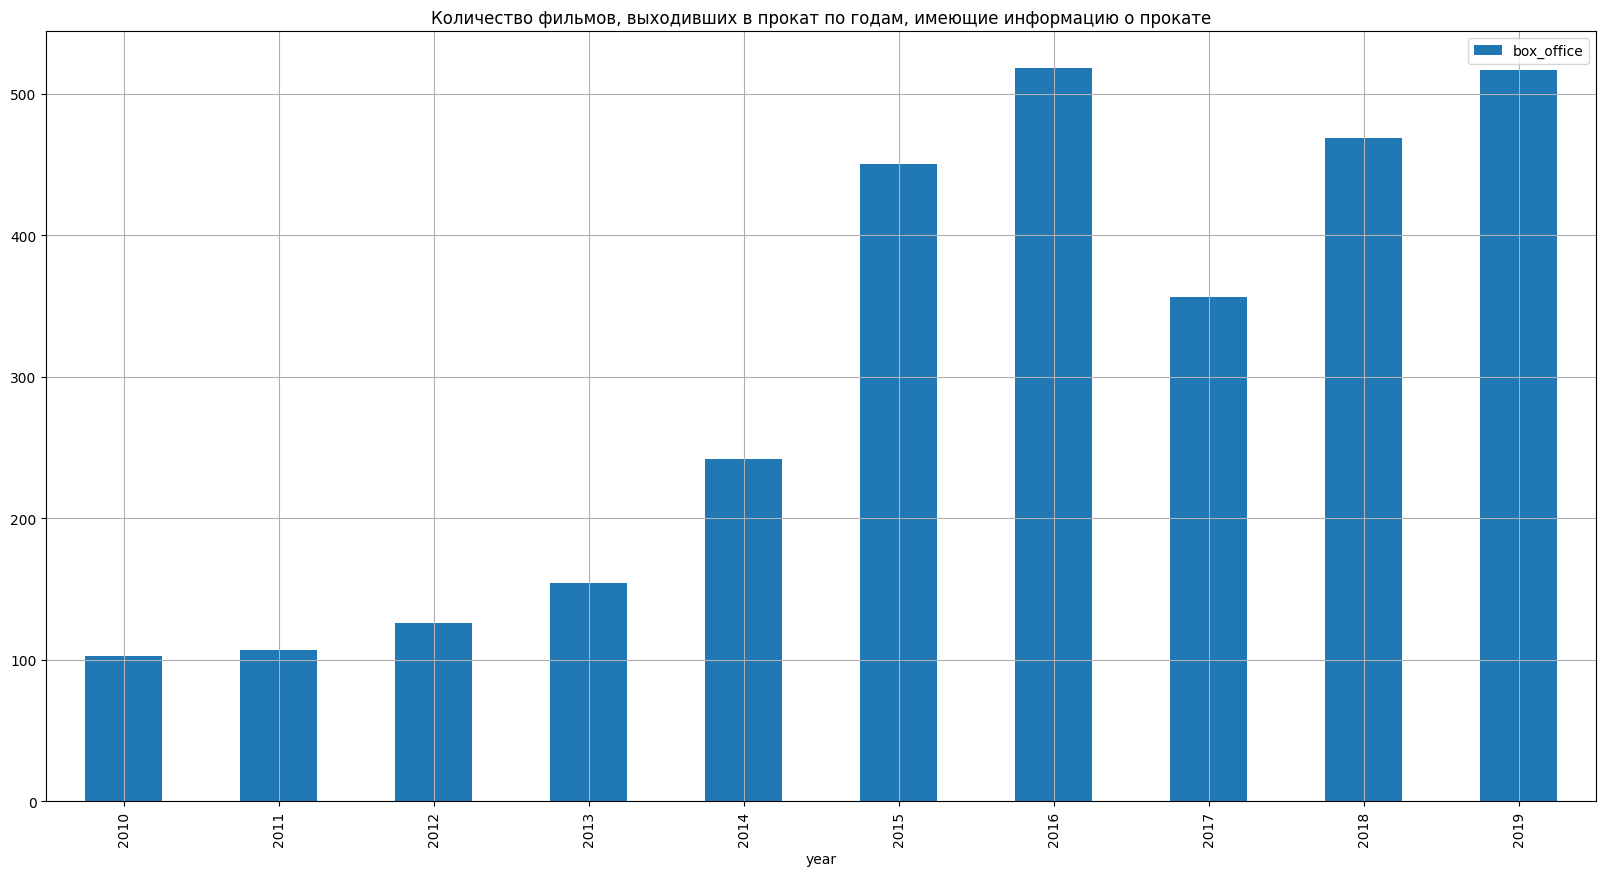

In [63]:
rental_year.plot(kind='bar', grid=True,figsize=(20,10),title = 'Количество фильмов, выходивших в прокат по годам, имеющие информацию о прокате')


с каждым годом фильмов выходит в прокат все больше, в 2017 был спад, но до 2019 тенденчия к росту сохраняется

In [64]:
# Доля фильмов с информацией о прокате 
ratio_films = len(df.query('box_office.isna()==False'))/len(df)
print(f'Доля фильмов с информацией о прокате: {ratio_films:.2f}')

Доля фильмов с информацией о прокате: 0.44


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [65]:
box_office = df.pivot_table(index='year',values=['box_office'],aggfunc='count')

<AxesSubplot:title={'center':'Количество фильмов, выходивших в прокат по годам'}, xlabel='year'>

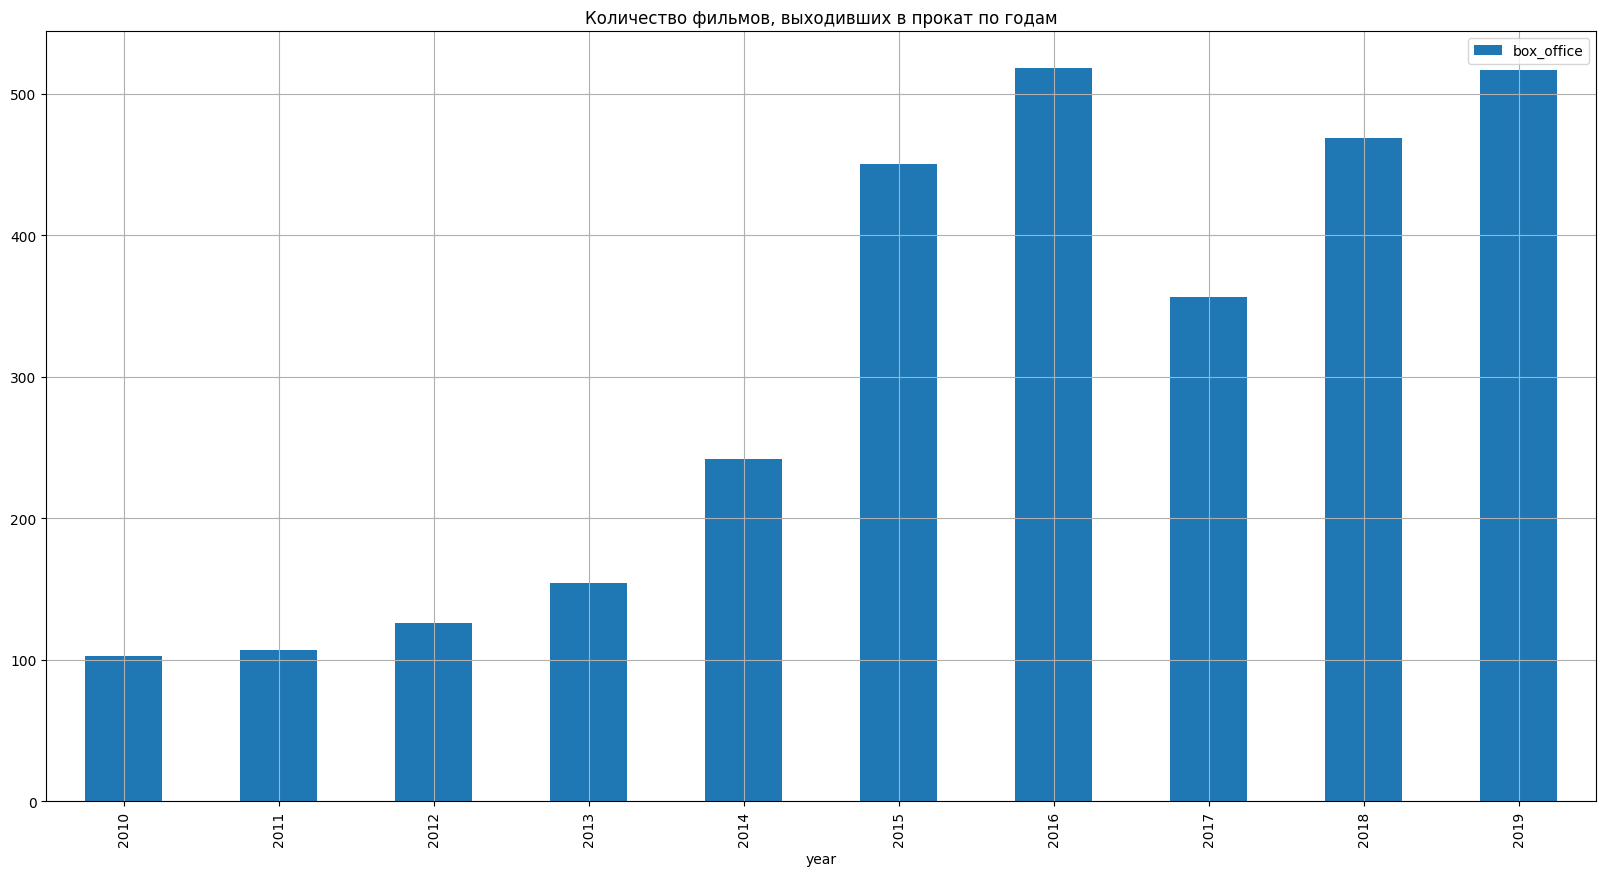

In [66]:
 box_office.plot(kind='bar', grid=True,figsize=(20,10),title = 'Количество фильмов, выходивших в прокат по годам')

In [67]:
sum_boxoffice = df.query('box_office.isna()==False').pivot_table(index = 'year', values= 'box_office',aggfunc='sum')

In [68]:
sum_boxoffice # Выведем суммарные сборы по годам

,box_office
year,
2010,"2,425,499.0"
2011,"14,095,925.0"
2012,"6,938,643.0"
2013,"29,539,565.2"
2014,"7,439,092,059.9"
2015,"39,207,278,270.1"
2016,"47,864,868,433.9"
2017,"48,562,251,655.5"
2018,"49,622,695,308.8"


<AxesSubplot:title={'center':'Суммарные сборы фильмов, выходивших в прокат по годам'}, xlabel='year'>

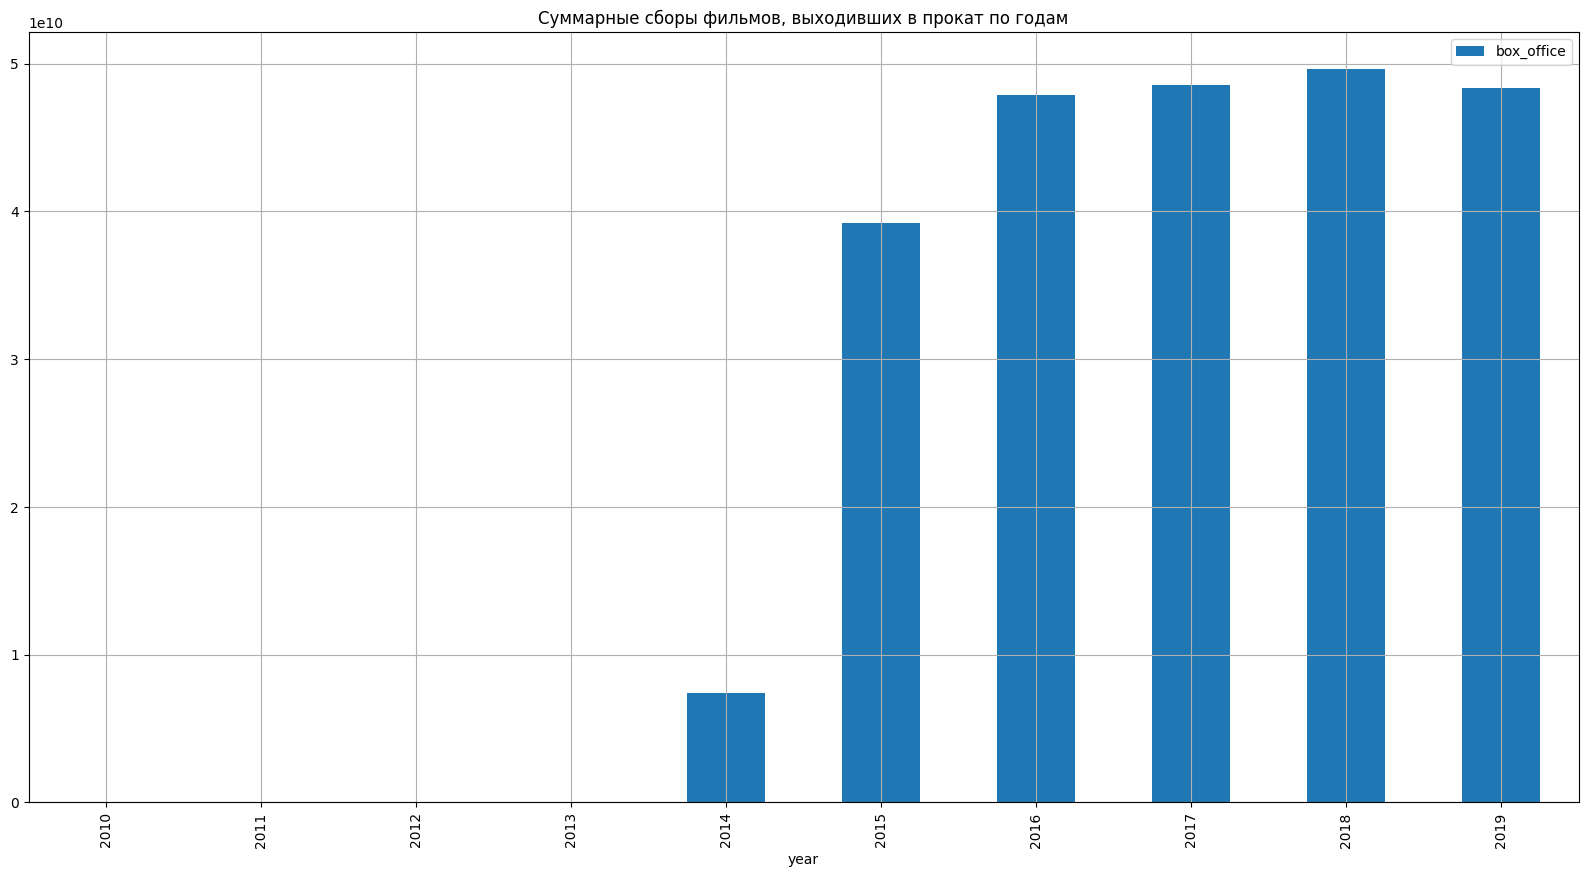

In [69]:
sum_boxoffice.plot(kind='bar',grid=True, figsize=(20,10),title = 'Суммарные сборы фильмов, выходивших в прокат по годам')

In [70]:
sum_boxoffice.describe()

,box_office
count,10.0
mean,"24,111,570,540.0"
std,"24,106,116,358.0"
min,"2,425,499.0"
25%,"17,956,835.1"
50%,"23,323,185,165.0"
75%,"48,241,107,138.4"
max,"49,622,695,308.8"


49,622,695,308.8 - Максимальные сборы 

2,425,499.0 - Минимальные сборы

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [71]:
df.pivot_table(index='year', values='box_office', aggfunc=('mean','median'))

,mean,median
year,,
2010,"23,548.5","1,700.0"
2011,"131,737.6","3,000.0"
2012,"55,068.6","5,660.0"
2013,"191,815.4","4,717.5"
2014,"30,740,049.8","69,120.0"
2015,"87,127,285.0","5,244,391.5"
2016,"92,403,220.9","4,091,820.0"
2017,"136,410,819.3","10,177,833.5"
2018,"105,805,320.5","8,891,102.2"


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [72]:
boxoffice_by_category = df.query('(year in [2015,2016,2017,2018,2019]) and (box_office.isna()==False)').pivot_table(index='age_restriction', values='box_office', aggfunc='sum').sort_values(by ='box_office')

In [73]:
boxoffice_by_category # Суммарные сборы в период с 2015 по 2019 в зависимости от возрастных рейтингов

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"809,073,986.0"
«18+» - запрещено для детей,"40,735,075,806.0"
«6+» - для детей старше 6 лет,"55,753,316,018.4"
«12+» - для детей старше 12 лет,"60,310,107,445.2"
«16+» - для детей старше 16 лет,"76,016,040,452.6"


<AxesSubplot:title={'center':'Зависимость кассовых сборов от возрастного рейтинка в период с 2015 по 2019 год'}, xlabel='age_restriction'>

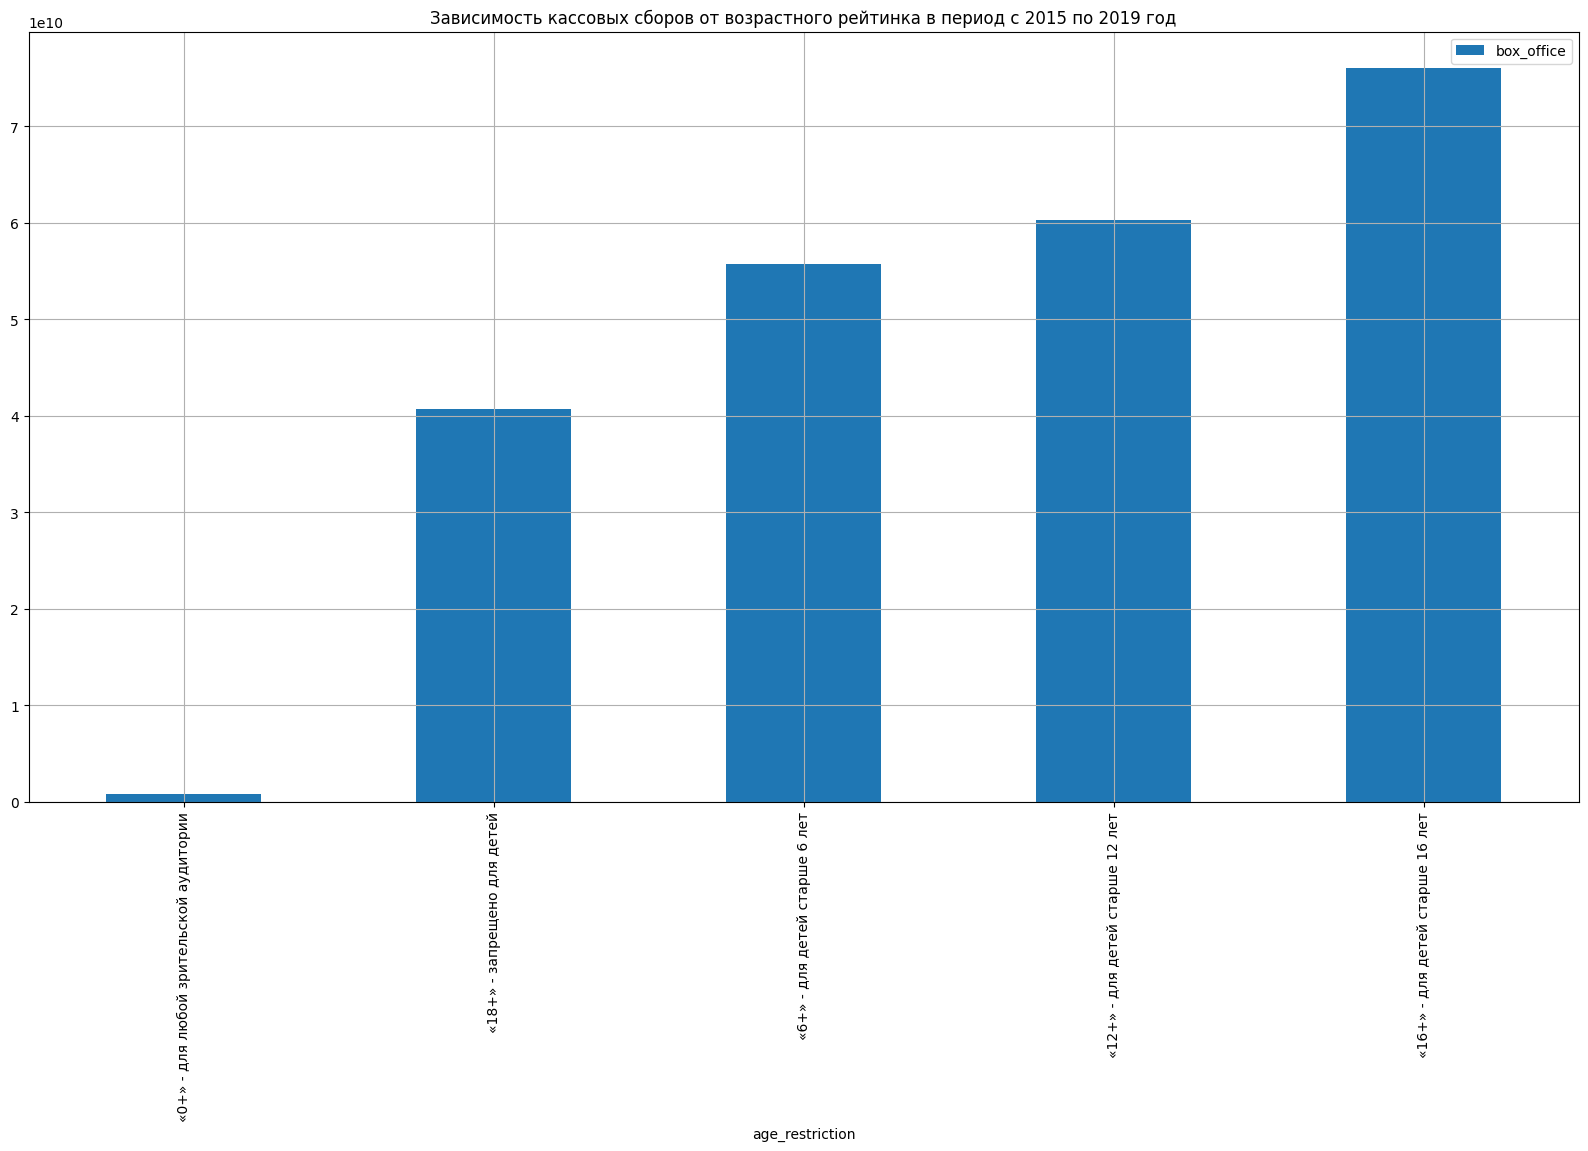

In [74]:
boxoffice_by_category.plot(kind='bar',grid=True, figsize=(20,10),title = 'Зависимость кассовых сборов от возрастного рейтинка в период с 2015 по 2019 год')

Самые кассовые фильмы в заданный период имеют возрастное ограничение "16+"

На втором месте "12+"

на третьем с небольшим отставанием "6+"

In [75]:
boxoffice_by_category_and_year = df.query('(year in [2015,2016,2017,2018,2019]) and (box_office.isna()==False)')\
                                    .pivot_table(index=['year','age_restriction'], values='box_office', aggfunc='sum')

In [76]:
boxoffice_by_category_and_year

box_office
year age_restriction                                        
2015 «0+» - для любой зрительской аудитории    379,054,578.4
     «12+» - для детей старше 12 лет        13,329,051,330.2
     «16+» - для детей старше 16 лет        11,368,036,000.3
     «18+» - запрещено для детей             5,430,623,649.8
     «6+» - для детей старше 6 лет           8,700,512,711.4
2016 «0+» - для любой зрительской аудитории    150,225,408.7
     «12+» - для детей старше 12 лет        12,204,444,624.4
     «16+» - для детей старше 16 лет        16,663,123,353.7
     «18+» - запрещено для детей             6,793,929,818.9
     «6+» - для детей старше 6 лет          12,053,145,228.2
2017 «0+» - для любой зрительской аудитории    229,598,930.0
     «12+» - для детей старше 12 лет         7,849,972,098.7
     «16+» - для детей старше 16 лет        18,745,042,900.1
     «18+» - запрещено для детей             9,651,495,581.0
     «6+» - для детей старше 6 лет          12,086,142,145.8
2018 «0+» - для любой зрительской аудитории     32,449,002.1
     «12+» - для детей старше 12 лет        14,248,929,053.7
     «16+» - для детей старше 16 лет        16,496,802,118.0
     «18+» - запрещено для детей             8,749,736,521.0
     «6+» - для детей старше 6 лет          10,094,778,613.9
2019 «0+» - для любой зрительской аудитории     17,746,066.8
     «12+» - для детей старше 12 лет        12,677,710,338.2
     «16+» - для детей старше 16 лет        12,743,036,080.5
     «18+» - запрещено для детей            10,109,290,235.3
     «6+» - для детей старше 6 лет          12,818,737,319.1

<AxesSubplot:title={'center':'Зависимость кассовых сборов от возрастного рейтинка по годам'}, xlabel='year,age_restriction'>

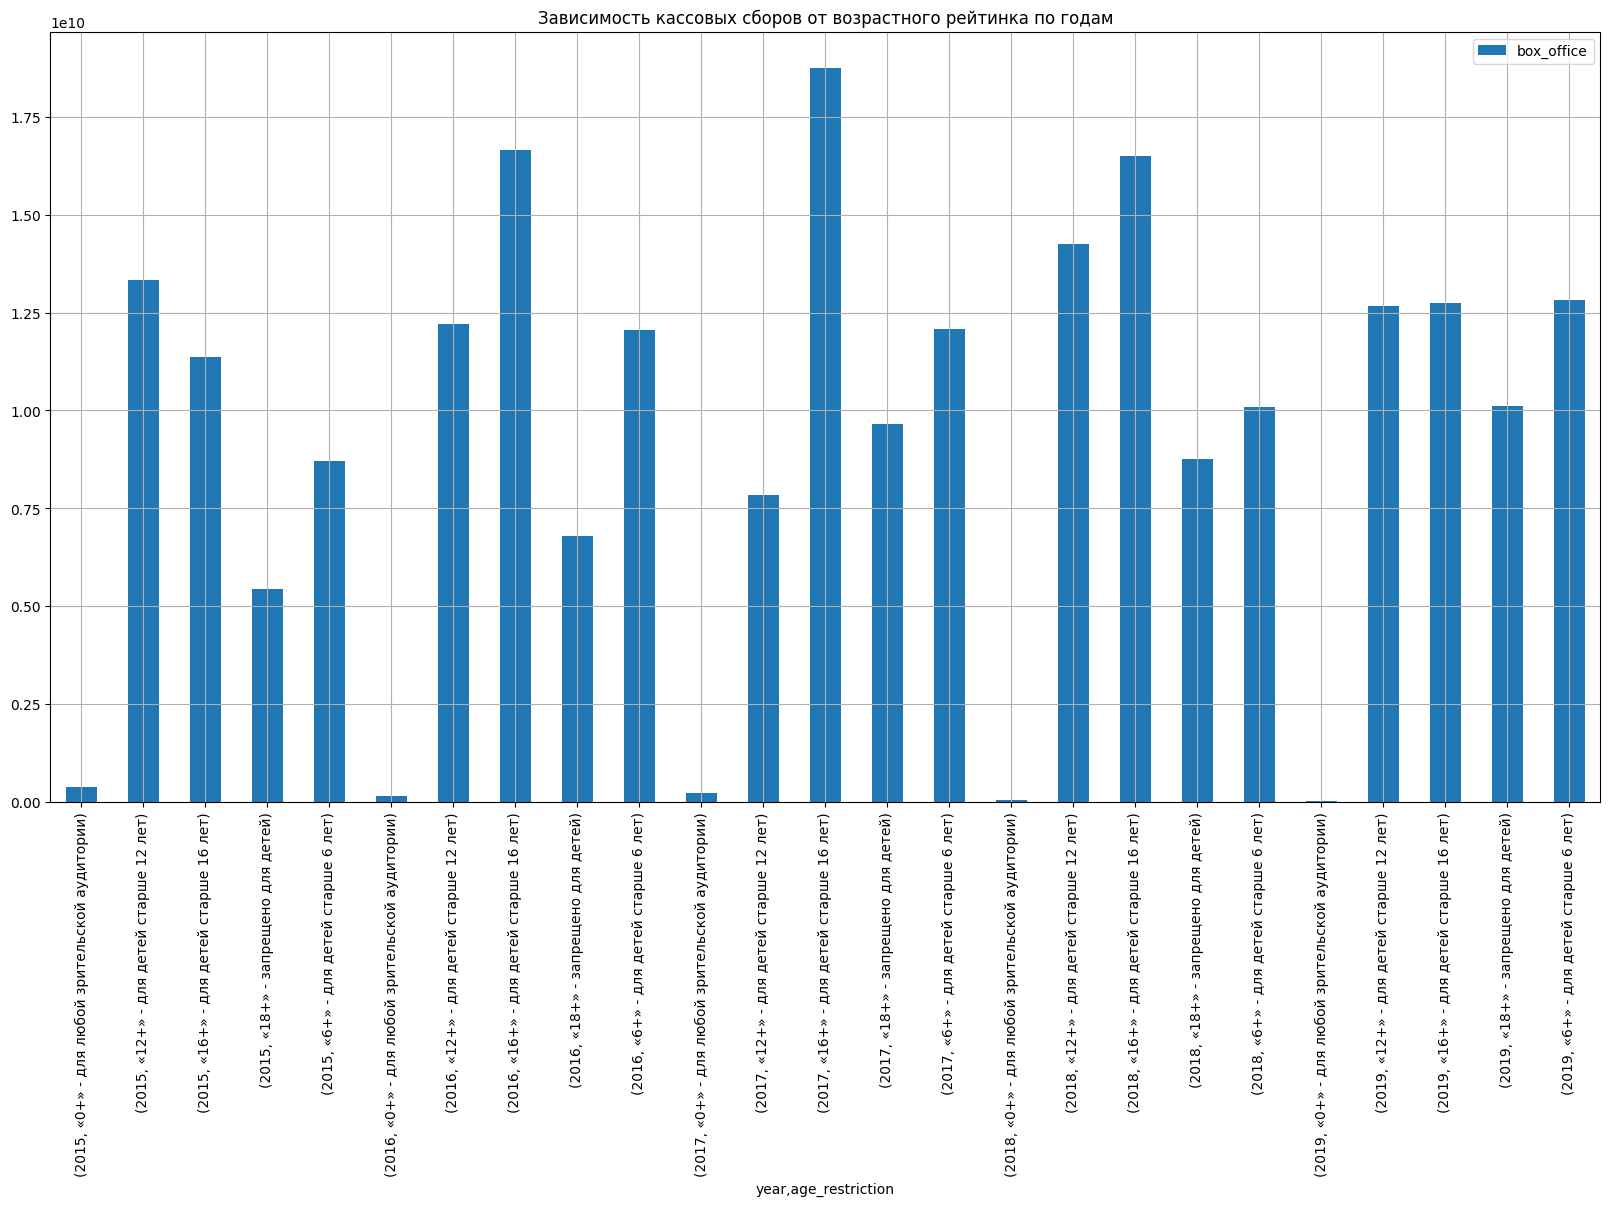

In [77]:
boxoffice_by_category_and_year.plot(kind='bar',grid=True, figsize=(20,10),title = 'Зависимость кассовых сборов от возрастного рейтинка по годам')

*Для 2015:*
1-е место рейтинг "12+"
1-е место рейтинг "16+"
1-е место рейтинг "6+"

*Для 2016:*
1-е место рейтинг "16+"
2-е место рейтинг "12+" и "6+" с одинаковыми сборами

*Для 2017:*
1-е место рейтинг "16+" (это наибольший показатель за весь период)
2-е место рейтинг "6+"
3-е место рейтинг "18+" (Впервые в тройку вошла эта категория)

*Для 2018:*
1-е место рейтинг "16+"
2-е место рейтинг "12+"
3-е место рейтинг "6+"

*Для 2019:*
Для этого года примерно одинкаовые сборы у категорий: "12+","16+","6+"

Во все года нименьшие сборы с большим отрывом собирает категория "0+"

##### Результаты исследовательского анализа
Для всех годов по сборам самая популярная категория "16+" и аутсайдер "0+"

Самый прибыльный год бы 2017. До 2017 года наблюдался медианных сборов за год, после 2017 прибыль пошла на спад.

Среднее значение сборов по годам сильно завышены из за выбросов

49,622,695,308.8 - Максимальные сборы

2,425,499.0 - Минимальные сборы

Доля фильмов с информацией о прокате: 0.44

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [78]:
gos_films = df.query('budget.isna() != True').copy()

In [79]:
gos_films.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_first_name,first_ganre,share_of_support
1042,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",министерство культуры,8.1,"драма,мелодрама","365,353.6",2013,атанесян,драма,0.3
1203,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",министерство культуры,NaN,NaN,"28,140.0",2014,якимчук,NaN,0.7
1249,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",фонд кино,5.3,"комедия,фантастика","19,957,031.5",2013,давлетьяров,комедия,0.6
1275,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",министерство культуры,4.2,драма,"55,917.5",2014,миндадзе (псевдоним катя шагалова),драма,0.7
1532,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",министерство культуры,6.4,драма,"232,100.0",2014,угаров,драма,0.6


In [80]:
gos_films['support'] = gos_films['refundable_support']+gos_films['nonrefundable_support']

In [81]:
gos_films['support'].describe()

count           330.0
mean     60,668,752.5
std      72,790,469.4
min       3,000,000.0
25%      25,311,250.0
50%      35,000,000.0
75%      60,000,000.0
max     500,000,000.0
Name: support, dtype: float64

<AxesSubplot:>

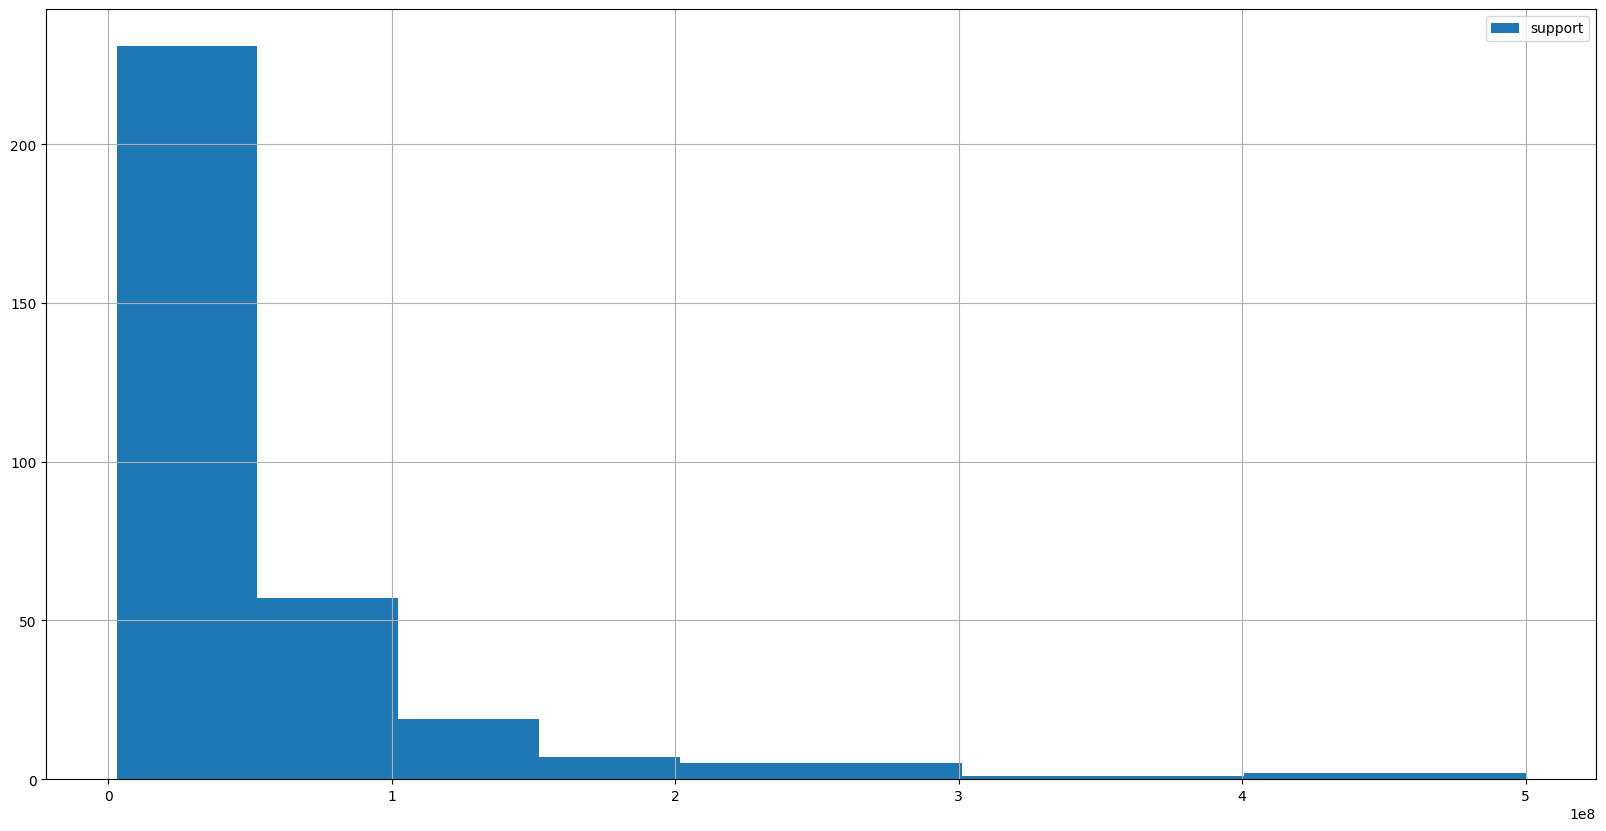

In [82]:
gos_films['support'].hist(bins=10, figsize = (20,10), range=(3000000, 500000000), legend=True)

In [83]:
def category_of_support(i):
    
    if i <= 100000000:
        return 'Категория до 100млн'
    elif 100000000< i <= 200000000:
        return 'Категория до 200млн'
    elif 200000000< i <= 300000000:
        return 'Категория до 300млн'
    elif 300000000< i <= 400000000:
        return 'Категория до 400млн'
    elif 400000000< i <= 500000000:
        return 'Категория до 500млн'
    
 

In [84]:
gos_films['category_of_support'] = gos_films['support'].apply(category_of_support)

<AxesSubplot:>

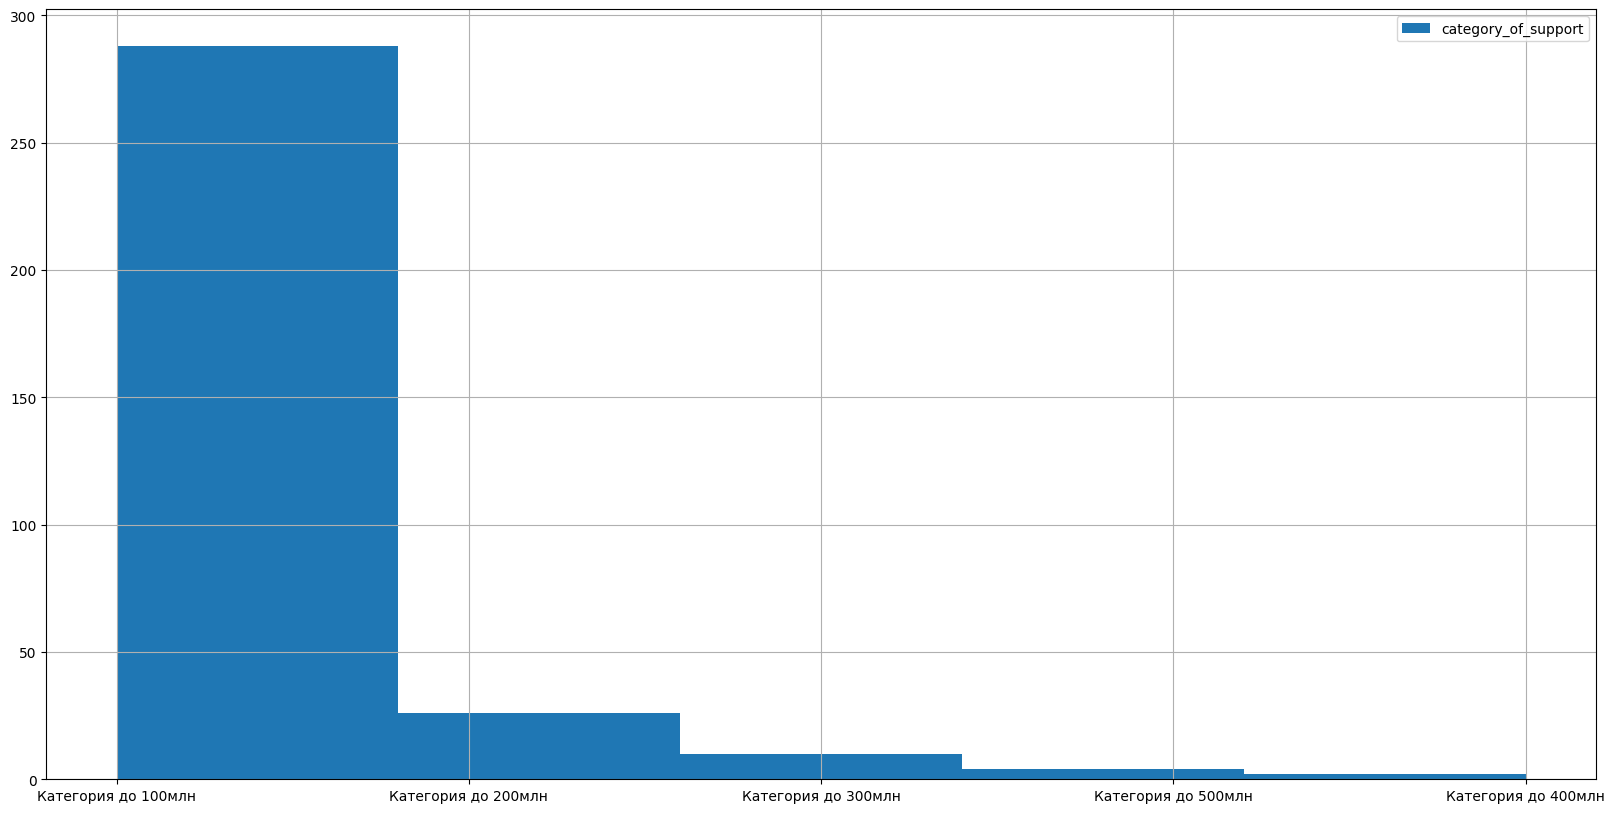

In [85]:
gos_films['category_of_support'].hist(bins=5, figsize = (20,10), legend=True)

In [86]:
gos_films.query('category_of_support == "Категория до 500млн"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,director_first_name,first_ganre,share_of_support,support,category_of_support
2517,экипаж,111005416,2016-03-21 12:00:00+00:00,художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,лебедев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,"50,000,000.0",...,фонд кино,7.6,"драма,триллер,приключения","1,402,255,390.0",2016,лебедев,драма,0.7,"442,104,482.0",Категория до 500млн
2924,дуэлянт,111015416,2016-09-14 12:00:00+00:00,художественный,"ооо ""нон-стоп продакшн""",россия,мизгирев,"а.роднянский, с.мелькумов",«16+» - для детей старше 16 лет,"150,000,000.0",...,фонд кино,6.6,драма,"364,285,139.6",2016,мизгирев,драма,0.7,"450,000,000.0",Категория до 500млн
6895,союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.0",...,фонд кино,6.0,"история,биография,драма","717,703,185.5",2019,кравчук,история,0.5,"500,000,000.0",Категория до 500млн
6905,вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.0",...,фонд кино,5.7,"фантастика,боевик",NaN,2019,ф.бондарчук,фантастика,0.5,"500,000,000.0",Категория до 500млн


Наибольшее количество фильмов с господдержкой до 100 млн рублей.

Минимальная поддержка составляет 3 млн, а максимальная 500млн.

Чаще всего встречается господдержка в размере 35 млн.

75% выборки с господдержкой меньше 60 млн.

In [87]:
df['ratings'].describe() #  посмотрим как распределяется рейтинг по всем фильмам

count   6,041.0
mean        6.4
std         1.2
min         0.2
25%         5.8
50%         6.6
75%         7.2
max         9.2
Name: ratings, dtype: float64

Распределим по категиям рейтинг:
25% фильмов с рейтингов ниже 5.8, присвоим таким фильмам категорию "Низкий рейтинг"

50% фильмов с рейтингов ниже 6.6, присвоим  фильмам с рейтингом от 5.8 до 6.6 категорию "Средний рейтинг"    
    
25% фильмов с рейтингов выше 7.2, присвоим таким фильмам категорию "Высокий рейтинг"

In [88]:
def category_by_rating (i):
    if i <= 5.8:
        return 'Низкий рейтинг'
    elif 5.8 < i <= 6.6:
        return 'Средний рейтинг'
    
    return 'Высокий рейтинг'
    

In [89]:
gos_films['category_by_rating'] = gos_films['ratings'].apply(category_by_rating)

In [90]:
gos_films_category = gos_films.pivot_table(index = ['category_by_rating','category_of_support'], values = 'puNumber' , aggfunc = 'count').sort_values(by='puNumber', ascending = False).copy()

In [91]:
gos_films_category

puNumber
category_by_rating category_of_support          
Низкий рейтинг     Категория до 100млн       113
Высокий рейтинг    Категория до 100млн        89
Средний рейтинг    Категория до 100млн        86
                   Категория до 200млн        12
Низкий рейтинг     Категория до 200млн         9
Высокий рейтинг    Категория до 300млн         6
                   Категория до 200млн         5
Низкий рейтинг     Категория до 300млн         3
Средний рейтинг    Категория до 500млн         2
Высокий рейтинг    Категория до 400млн         1
                   Категория до 500млн         1
Низкий рейтинг     Категория до 500млн         1
Средний рейтинг    Категория до 300млн         1
                   Категория до 400млн         1

<AxesSubplot:title={'center':'Количество фильмов с господдержкой по категориям рейтинга и размера господдержки'}, xlabel='category_by_rating,category_of_support'>

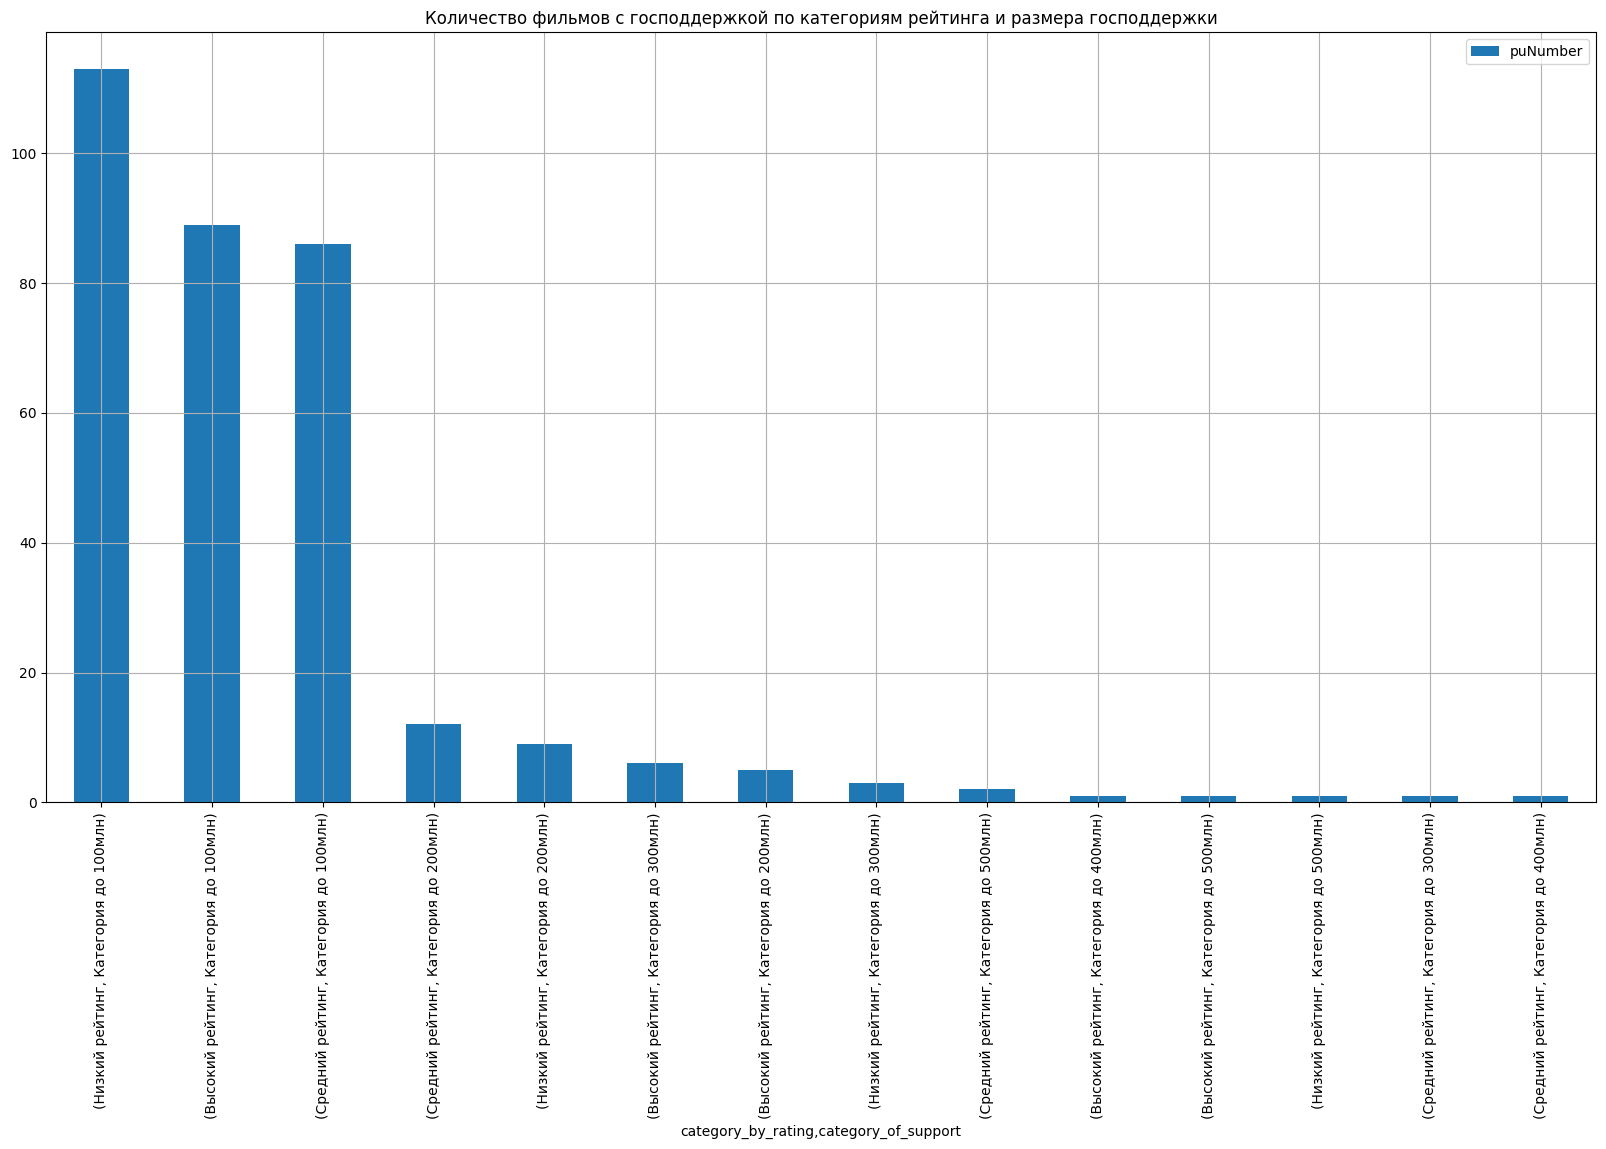

In [92]:

gos_films_category.plot(kind='bar',grid=True, figsize=(20,10),title = 'Количество фильмов с господдержкой по категориям рейтинга и размера господдержки')

Катагория до 100млн лидирует по всем трем категориям рейтинга: 

На первом месте "Низкий рейтинг", На втором "Высокий рейтинг" и на третьем - "Средний рейтинг"



Приведем критерии по которым будем оценивать влияние факторов друг на друга:
>Корреляция по критерию Пирсона:
>>слабая -- 0,1-0,3

>>умереная -- 0,3-0,5

>>заметная -- 0,5-0,7

>>высокая -- 0,7-0,9

>>весьма высока -- 0,9-1,0




In [93]:
gos_films.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,share_of_support,support
puNumber,1.0,0.0,-0.0,-0.0,0.0,0.1,-0.0,0.0,-0.0
refundable_support,0.0,1.0,0.4,0.6,0.0,0.3,0.1,-0.0,0.6
nonrefundable_support,-0.0,0.4,1.0,0.6,0.1,0.5,0.1,0.1,0.9
budget,-0.0,0.6,0.6,1.0,0.1,0.4,0.2,-0.3,0.7
ratings,0.0,0.0,0.1,0.1,1.0,0.2,0.1,0.0,0.1
box_office,0.1,0.3,0.5,0.4,0.2,1.0,0.1,-0.1,0.5
year,-0.0,0.1,0.1,0.2,0.1,0.1,1.0,-0.1,0.1
share_of_support,0.0,-0.0,0.1,-0.3,0.0,-0.1,-0.1,1.0,0.1
support,-0.0,0.6,0.9,0.7,0.1,0.5,0.1,0.1,1.0


<AxesSubplot:xlabel='budget', ylabel='box_office'>

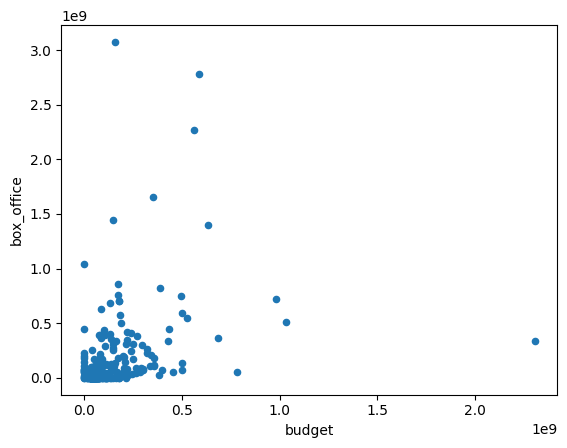

In [94]:
 gos_films.plot(x='budget', y='box_office', kind='scatter')


корреляция бюджета и кссовых сборов умеренная положительная (0,4)

<AxesSubplot:xlabel='ratings', ylabel='box_office'>

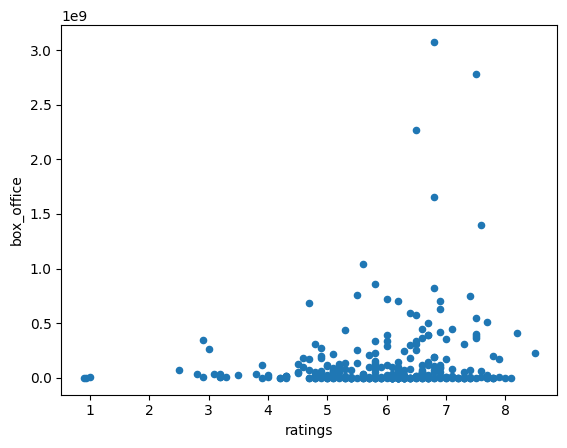

In [95]:
 gos_films.plot(x='ratings', y='box_office', kind='scatter')

корреляция рейтинга и кссовых сборов слабая положительная (0,2)

<AxesSubplot:xlabel='support', ylabel='box_office'>

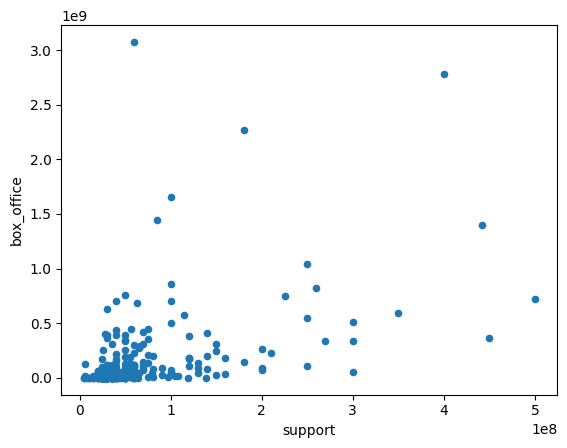

In [96]:
 gos_films.plot(x='support', y='box_office', kind='scatter')

корреляция поддержки и кссовых сборов умеренная положительная (0,5)

<AxesSubplot:xlabel='budget', ylabel='year'>

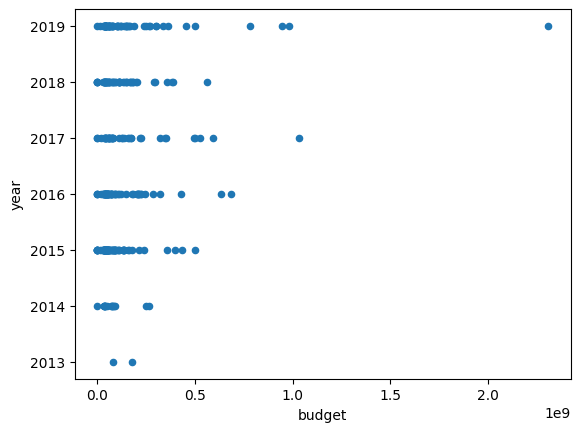

In [97]:
 gos_films.plot(x='budget', y='year', kind='scatter')

корреляция бюджета и года умеренная слабая положительная (0,2)

In [98]:
# создадим отфильтрованный датасет
gos_films_wonan = gos_films.query('(budget.isna() != True)and(box_office.isna() == False)and(budget != 0)').copy()
# посчитаем окупаемость фильма и добавим ее в новый столбец
gos_films_wonan['payback'] = gos_films_wonan['box_office']/gos_films_wonan['budget']

In [99]:
len(gos_films_wonan)# посмотрим сколько фильмов попало в выборку после фильтрации

300

<AxesSubplot:xlabel='category_of_support'>

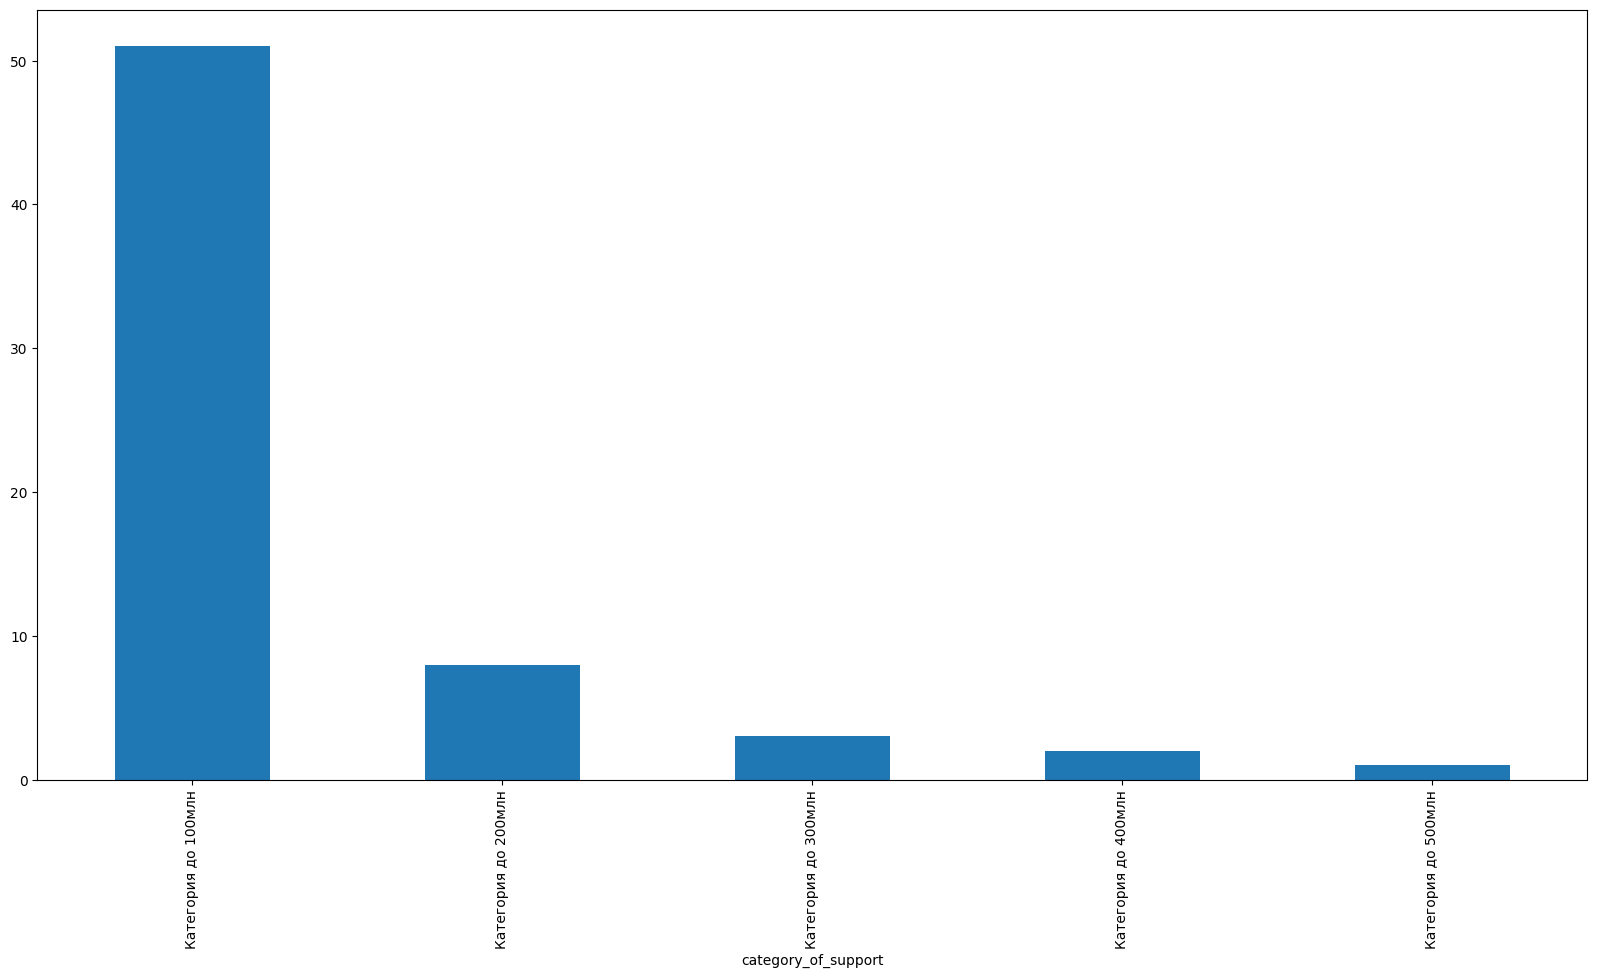

In [100]:
#
gos_films_wonan.query('payback >= 1').groupby('category_of_support')['payback'].count().plot(kind='bar', figsize = (20,10))

Окупаемость у фильмов с господдержкой не большая (всего 65 фильмов из 300)

Из них 50 это фильмы с господдержкой до 100 млн рублей.

##### Результаты исследования фильмов получивших господдержку

Наибольшее количество фильмов с господдержкой до 100 млн рублей.

Минимальная поддержка составляет 3 млн, а максимальная 500млн.

Чаще всего встречается господдержка в размере 35 млн.

75% выборки с господдержкой меньше 60 млн

Катагория до 100млн лидирует по всем трем категориям рейтинга:

На первом месте "Низкий рейтинг", На втором "Высокий рейтинг" и на третьем - "Средний рейтинг"

Сильных корреляций между данными нет, наивысший показатель зависимости (0,5) был выявлен у пары "support"-"box_office"

### Шаг 5. Напишите общий вывод

Для мирового кино :

49,622,695,308.8 - Максимальные сборы

2,425,499.0 - Минимальные сборы

по сборам самая популярная категория "16+" 

Самый прибыльный год бы 2017

Для российского кино:

Сложно говорить о трендах конкретно для фильмов с господдержкой, так как выборка составляет всего 300 фильмов. 

господдержка:

Наибольшее количество фильмов с господдержкой до 100 млн рублей.

Минимальная поддержка составляет 3 млн, а максимальная 500млн

Чаще всего встречается господдержка в размере 35 млн
